# Quality-Assurance-Microchip_Implementation of Regularized Logistic Rgression 

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from scipy.optimize import minimize

## Data visualization

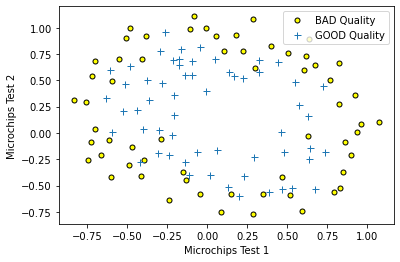

In [37]:
with open('Quality_Assurance_Microchips.txt','r') as f:
    data = f.readlines()
data = [list(map(float,i.split(','))) for i in data]
data = np.array(data)
X = data[:,:-1]; y = data[:,-1]
m,n = X.shape[0],X.shape[1]
fig,ax = plt.subplots()
s0 = [i for i in range(m) if y[i]==0]
s1 = [i for i in range(m) if y[i]==1]
ax.plot(X[:,0][s0],X[:,1][s0],'ko',markersize=5,markerfacecolor='yellow',label='BAD Quality')
ax.plot(X[:,0][s1],X[:,1][s1],'+',markersize=7,markerfacecolor='blue',label='GOOD Quality')
y=y.reshape(m,1)
plt.ylabel('Microchips Test 2')
plt.xlabel('Microchips Test 1')
legend = ax.legend(loc='upper right',shadow=False,fontsize='medium')

## Feature Mapping

In [38]:
# Get more polynomial features like X1**1*X2**j where i+J<=degree
tmp = X
def mapFeature(X):
    degree = 6
    m =X.shape[0]
    newX = [np.multiply(X[:,0]**i, X[:,1]**j) for i in range(0,degree+1) for j in range(0,degree+1-i)]
    newX = np.array(newX).T
    return newX

X = mapFeature(tmp)

In [39]:
initial_theta = np.zeros((X.shape[1],1))
lamda = 1
def sigmod(z):
    g = np.zeros(z.shape)
    g = 1.0/(1+np.exp(-z))
    return g

def costFunctionReg(theta, X, y, lamda):
    m,n = X.shape[0],X.shape[1]
    J = 0.0
    h = sigmod(X.dot(theta))
    grad = np.zeros(theta.shape)
    J = 1./m*(-np.log(h).T.dot(y) - np.log(1-h).T.dot(1-y)) \
       + lamda/(2*m)*(theta[1:].T.dot(theta[1:]))
    return J

def gradient(theta, X, y, lamda):
    m,n = X.shape[0],X.shape[1]
    grad = np.zeros(theta.shape)
    h = sigmod(X.dot(theta))
    grad = 1.0/m*(X.T).dot(h-np.squeeze(y)) + lamda/m*theta
    grad[0] = grad[0] - lamda/m*theta[0]
    return grad


In [40]:
initial_theta = np.ones((X.shape[1],1))
lamda = 1
xopt = minimize(costFunctionReg, x0=initial_theta, args=(X,y,lamda), jac = gradient, method='TNC',options={'disp':True})

  NIT   NF   F                       GTG
    0    1  2.134848314665857E+00   2.69332522E-01
    1    6  6.528351881685246E-01   7.07227087E-03
    2   11  5.398377841374067E-01   4.60476362E-04
tnc: fscale = 23.3006
    3   16  5.291987096393483E-01   7.66552747E-06
    4   20  5.290072619151001E-01   2.59786791E-07
tnc: fscale = 980.983
    5   25  5.290028602964426E-01   8.36449820E-09
    6   29  5.290027595680775E-01   3.63742273E-09
    7   34  5.290027327417444E-01   1.14550782E-10
tnc: fscale = 46716.6
tnc: |fn-fn-1] = 2.99717e-09 -> convergence
    8   39  5.290027297445785E-01   1.74817811E-12
tnc: Converged (|f_n-f_(n-1)| ~= 0)


## Plot the decision boundary

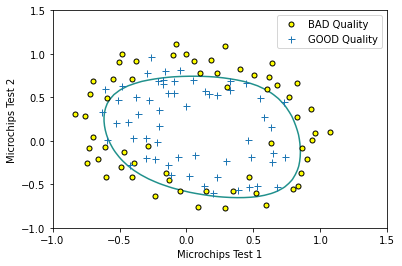

In [41]:
def plotDecisionBoundary(theta, X, y):
    # Grid range
    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    z = np.zeros((u.shape[0],v.shape[0]))
    degree = 6
    for i in range(u.shape[0]):
        for j in range(v.shape[0]):
            NewF = [u[i]**a*v[j]**b for a in range(0,degree+1) for b in range(0,degree+1-a)]
            NewF = np.array(NewF)
            z[i,j] = NewF.dot(theta)
    ax.contour(u,v,z,0)
    
plotDecisionBoundary(xopt.x, X, y)
fig 

## Prediction and Accuracies

In [42]:
prob = sigmod(np.array([0.5**a*1.2**b for a in range(0,6+1) for b in range(0,6+1-a)]).T.dot(xopt.x))
print('For a microchip with Test_1 0.5 and Test_2 1.2, we predict the probability of the accepted: %f' % prob)

For a microchip with Test_1 0.5 and Test_2 1.2, we predict the probability of the accepted: 0.000195


In [43]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((X.shape[0],1))
    h = sigmod(X.dot(theta))
    p = [0 if i<0.5 else 1 for i in h]
    return p
p = predict(xopt.x,X)
accu = sum([1 for i in range(m) if abs(p[i]-y[i]) < 0.0001])/m*100
print('Training Accuracy: %.2f \n' % accu)

Training Accuracy: 83.05 



## Plot Decision Boundary for different regularization parameter lamda

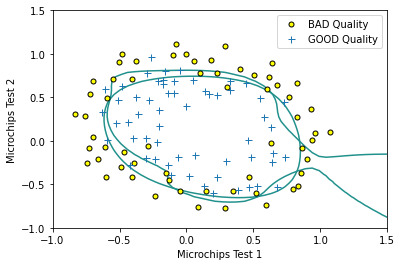

In [44]:
#No regularization (Overfitting)
lamda = 0
xopt = minimize(costFunctionReg, x0=initial_theta, args=(X,y,lamda), jac = gradient, method='TNC',options={'disp':False})
plotDecisionBoundary(xopt.x, X, y)
fig

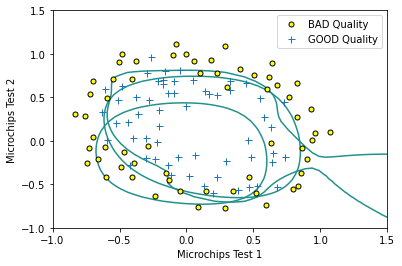

In [45]:
#Too much regularization (Underfitting)
lamda = 100
xopt = minimize(costFunctionReg, x0=initial_theta, args=(X,y,lamda), jac = gradient, method='TNC',options={'disp':False})
plotDecisionBoundary(xopt.x, X, y)
fig